Correlation:
Green credit default rate                                1.000000
Proportion of green credit loans                         0.556955
Proportion of interest expenses on green credit loans    0.556386
Log(assets)                                              0.298302
Value book ratio                                         0.179680
 utility model green patent applications                 0.128318
green patent applications                                0.122562
green patents granted                                    0.121215
Debt-to-asset ratio                                      0.115413
mortgage                                                 0.106795
green inventions                                         0.106560
green invention patents authorized                       0.075550
province                                                 0.014996
Inventory turnover ratio                                 0.009456
Restricted industry for green credit                     0.0093

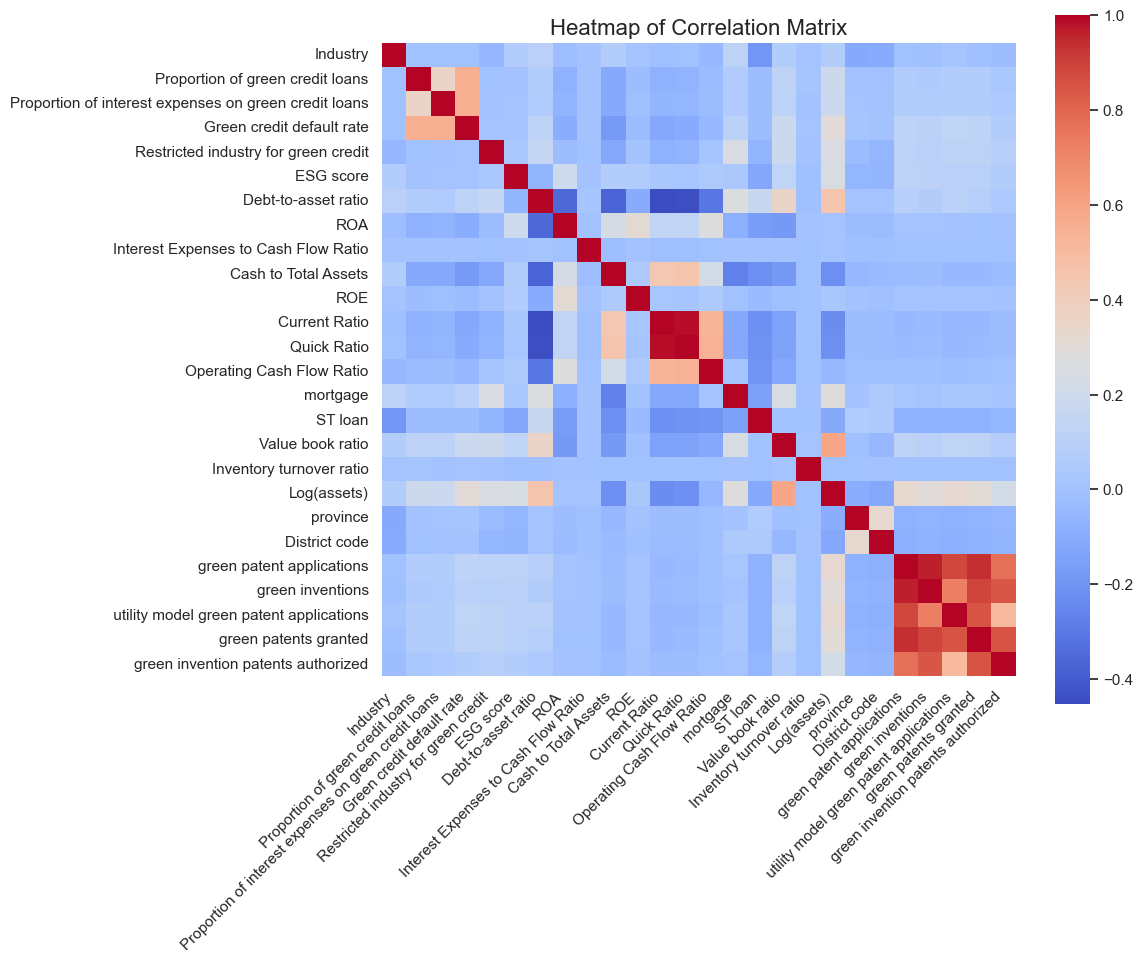

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# 计算相关性
correlation_matrix = df.corr()
correlation_matrix = correlation_matrix.drop(columns=["Code", "Year"], index=["Code", "Year"])
target_corr = correlation_matrix["Green credit default rate"].sort_values(ascending=False)

print("Correlation:")
print(target_corr)

# 可视化相关性矩阵（只显示颜色，不显示数值）
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    annot=False,         # 不显示格子里的数字
    cmap="coolwarm",      # 颜色主题
    square=True,          # 让格子是正方形的（可选）
    cbar=True             # 显示右侧的颜色条
)
plt.title("Heatmap of Correlation Matrix", fontsize=16)
plt.xticks(rotation=45, ha='right')  # 旋转x轴标签，更美观
plt.yticks(rotation=0)               # 保持y轴标签水平
plt.tight_layout()
plt.show()

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   3.3s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   3.3s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   3.3s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.4s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   3.3s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   3.3s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; 

/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=  35.2s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=  35.3s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=  17.2s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=  17.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   3.6s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   3.6s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   3.4s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=  17.0s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   3.4s
[CV] END max_features=sqrt, min_samples_lea

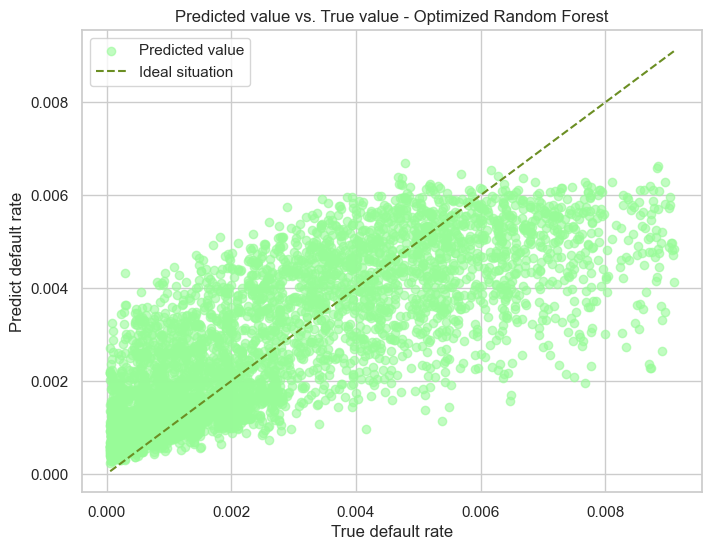

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import spearmanr

# 1️⃣ 读取数据
file_path = "greenloan_cleaned.xlsx"
df = pd.read_excel(file_path)

# 2️⃣ 处理异常值
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()

# 3️⃣ 处理类别变量（仅转换 'Industry'）
label_encoders = {}
categorical_cols = ["Industry","province"]

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 4️⃣ 选择特征和目标变量
X = df.drop(columns=["Code", "Year", "Green credit default rate"])  # 特征
y = df["Green credit default rate"]  # 目标变量

# 5️⃣ 标准化特征
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6️⃣ 数据集拆分
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 7️⃣ 定义超参数网格
param_grid = {
    "n_estimators": [100, 500, 1000],  # 100~1000 之间尝试
    "max_features": ["sqrt", "log2"],  # 试试 "sqrt" 和 "log2"
    "min_samples_split": [2, 5, 10],  # 最小样本分裂数
    "min_samples_leaf": [1, 2, 5]  # 叶子节点最小样本数
}

# 8️⃣ 进行超参数优化（GridSearchCV）
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring="r2", n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# 9️⃣ 获取最佳参数
best_params = grid_search.best_params_
print("Best:", best_params)

# 🔟 使用最佳参数训练最终模型
best_rf_model = RandomForestRegressor(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)

# 1️⃣1️⃣ 预测
y_pred = best_rf_model.predict(X_test)

# 1️⃣2️⃣ 计算回归指标
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
spearman_corr, _ = spearmanr(y_test, y_pred)

# 1️⃣3️⃣ 打印结果
print(f"R²: {r2:.6f}")
print(f"MSE: {mse:.6f}")
print(f"RMSE: {rmse:.6f}")
print(f"MAE: {mae:.6f}")
print(f"Spearman: {spearman_corr:.6f}")

# 1️⃣4️⃣ 可视化预测值 vs 真实值
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color="palegreen", label="Predicted value")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="olivedrab", linestyle="--", label="Ideal situation")
plt.xlabel("True default rate")
plt.ylabel("Predict default rate")
plt.title("Predicted value vs. True value - Optimized Random Forest")
plt.legend()
plt.show()

In [30]:
import optuna
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import spearmanr

# 2️⃣ 处理异常值
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()

# 3️⃣ 处理类别变量（仅转换 'Industry','province'）
label_encoders = {}
categorical_cols = ["Industry", "province"]

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 4️⃣ 选择特征和目标变量
X = df.drop(columns=["Code", "Year", "Green credit default rate"])  # 特征
y = df["Green credit default rate"]  # 目标变量

# 5️⃣ 标准化特征
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6️⃣ 数据集拆分
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 目标函数：Optuna 需要优化的目标
def objective(trial):
    # 选择超参数
    n_estimators = trial.suggest_int("n_estimators", 100, 1000, step=100)  # 100~1000，每次增加100
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2"])  # 选择特征数
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)  # 最小分裂样本数
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 5)  # 叶子节点最小样本数

    # 构建模型
    rf = RandomForestRegressor(
        n_estimators=n_estimators,
        max_features=max_features,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42,
        n_jobs=-1
    )
    
    # 训练模型
    rf.fit(X_train, y_train)
    
    # 预测测试集
    y_pred = rf.predict(X_test)
    
    # 计算 R² 作为优化目标
    r2 = r2_score(y_test, y_pred)
    
    return -r2  # 由于 Optuna 默认是最小化，我们取 -R²，使其最大化

# 运行 Optuna 进行超参数搜索
study = optuna.create_study(direction="minimize")  # 目标是最大化 R²（取负值）
study.optimize(objective, n_trials=2000)  # 运行 20 次实验

# 输出最佳超参数
print("最佳超参数:", study.best_params)

[I 2025-04-28 23:09:33,626] A new study created in memory with name: no-name-7a30a957-996d-4491-a89d-a35e61d2d682


[I 2025-04-28 23:09:39,763] Trial 0 finished with value: -0.6177739388418702 and parameters: {'n_estimators': 800, 'max_features': 'sqrt', 'min_samples_split': 5, 'min_samples_leaf': 5}. Best is trial 0 with value: -0.6177739388418702.
[I 2025-04-28 23:09:43,226] Trial 1 finished with value: -0.6199908802673636 and parameters: {'n_estimators': 400, 'max_features': 'sqrt', 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 1 with value: -0.6199908802673636.
[I 2025-04-28 23:09:46,424] Trial 2 finished with value: -0.6183611736788895 and parameters: {'n_estimators': 400, 'max_features': 'sqrt', 'min_samples_split': 8, 'min_samples_leaf': 5}. Best is trial 1 with value: -0.6199908802673636.
[I 2025-04-28 23:09:47,175] Trial 3 finished with value: -0.6144067554295054 and parameters: {'n_estimators': 100, 'max_features': 'log2', 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 1 with value: -0.6199908802673636.
[I 2025-04-28 23:09:48,851] Trial 4 finished with value:

最佳超参数: {'n_estimators': 400, 'max_features': 'sqrt', 'min_samples_split': 4, 'min_samples_leaf': 1}


R²: 0.624414
MSE: 0.000002
RMSE: 0.001394
MAE: 0.001042
Spearman: 0.814860


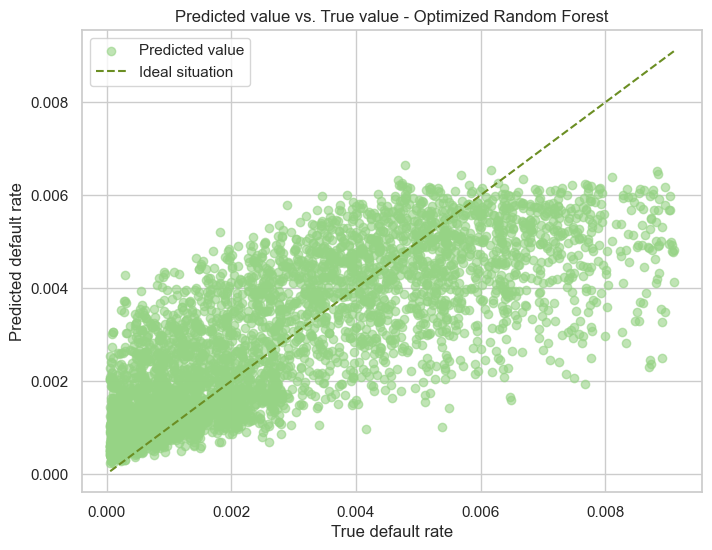

In [32]:
# 取出 Optuna 找到的最佳超参数
best_params = study.best_params

# 使用最佳超参数构建最终模型
best_rf_model = RandomForestRegressor(**best_params, random_state=42, n_jobs=-1)
best_rf_model.fit(X_train, y_train)

# 预测测试集
y_pred = best_rf_model.predict(X_test)

# 计算回归指标
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
spearman_corr, _ = spearmanr(y_test, y_pred)

# 打印结果
print(f"R²: {r2:.6f}")
print(f"MSE: {mse:.6f}")
print(f"RMSE: {rmse:.6f}")
print(f"MAE: {mae:.6f}")
print(f"Spearman: {spearman_corr:.6f}")

# 绘制预测值 vs 真实值
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color="#96D385", label="Predicted value")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="olivedrab", linestyle="--", label="Ideal situation")
plt.xlabel("True default rate")
plt.ylabel("Predicted default rate")
plt.title("Predicted value vs. True value - Optimized Random Forest")
plt.legend()
plt.show()

Repeated Train/Val Split (Random Forest): 100%|██████████| 500/500 [12:57<00:00,  1.55s/it]


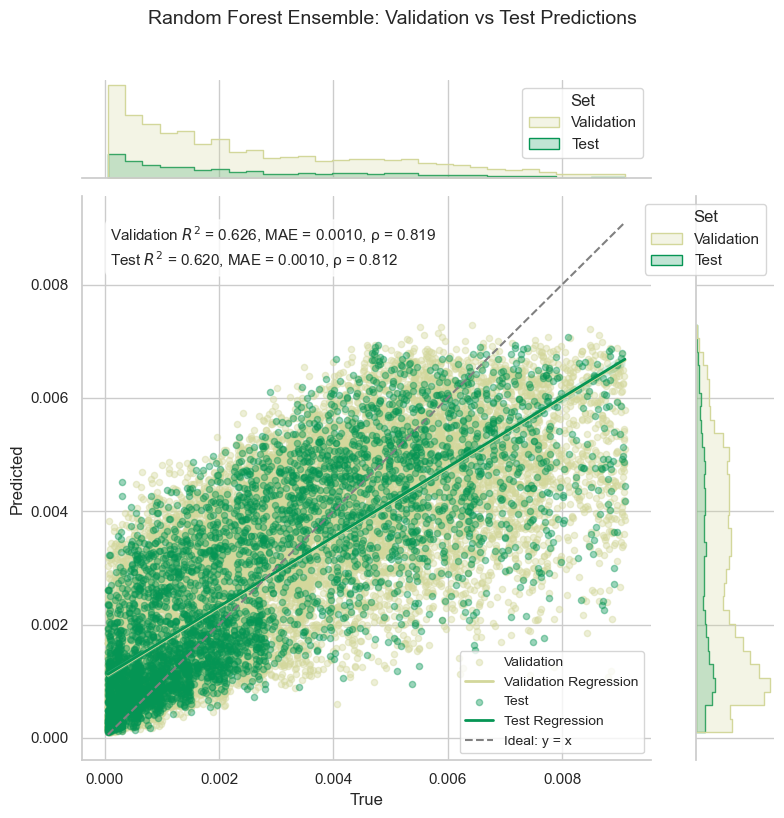

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import spearmanr
from tqdm import tqdm

# 1️⃣ 读取数据
df = pd.read_excel("GreenLoan_cleaned.xlsx")

# 2️⃣ 清洗数据
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# 3️⃣ 编码类别变量
categorical_cols = ["Industry", "province"]
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 4️⃣ 提取 X 和 y
X = df.drop(columns=["Code", "Year", "Green credit default rate"])
y = df["Green credit default rate"]

# 5️⃣ 标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6️⃣ 拆分测试集
X_trainval, X_test, y_trainval, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 7️⃣ 多次训练
n_repeats = 500
results = []
y_test_preds = []
y_val_preds = []  # ✅ 保存验证集预测（含索引）

for i in tqdm(range(n_repeats), desc="Repeated Train/Val Split (Random Forest)"):
    # 拆分验证集
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=i)

    # 训练模型
    model = RandomForestRegressor(random_state=i, n_jobs=-1)
    model.fit(X_train, y_train)

    # 验证集预测
    y_val_pred = model.predict(X_val)
    y_val_preds.append((y_val.index, y_val_pred))  # ✅ 保存索引和预测

    # 测试集预测
    y_test_pred = model.predict(X_test)
    y_test_preds.append(y_test_pred)

    # 评估函数
    def evaluate(y_true, y_pred):
        mse = mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)
        spearman_corr, _ = spearmanr(y_true, y_pred)
        return r2, mse, rmse, mae, spearman_corr

    r2_val, mse_val, rmse_val, mae_val, spearman_val = evaluate(y_val, y_val_pred)
    r2_test, mse_test, rmse_test, mae_test, spearman_test = evaluate(y_test, y_test_pred)

    results.append({
        "run": i + 1,
        "R2_val": r2_val,
        "MAE_val": mae_val,
        "RMSE_val": rmse_val,
        "Spearman_val": spearman_val,
        "R2_test": r2_test,
        "MAE_test": mae_test,
        "RMSE_test": rmse_test,
        "Spearman_test": spearman_test
    })

# 8️⃣ 平均测试预测结果（集成）
y_test_ensemble_pred = np.mean(y_test_preds, axis=0)

# 🔁 平均验证集预测结果（按索引聚合）
val_pred_dict = {}
for idx, preds in y_val_preds:
    for i, row_id in enumerate(idx):
        if row_id not in val_pred_dict:
            val_pred_dict[row_id] = []
        val_pred_dict[row_id].append(preds[i])

val_avg_preds = {k: np.mean(v) for k, v in val_pred_dict.items()}
df_val = pd.DataFrame({
    "True": y_trainval.loc[val_avg_preds.keys()],
    "Predicted": list(val_avg_preds.values()),
    "Set": "Validation"
})

# 🔟 准备测试集 DataFrame
df_test = pd.DataFrame({
    "True": y_test,
    "Predicted": y_test_ensemble_pred,
    "Set": "Test"
})

# 🔁 合并两组数据
df_plot = pd.concat([df_val, df_test], ignore_index=True)

# 📊 计算评估指标
r2_val = r2_score(df_val["True"], df_val["Predicted"])
r2_test = r2_score(df_test["True"], df_test["Predicted"])
mae_val = mean_absolute_error(df_val["True"], df_val["Predicted"])
mae_test = mean_absolute_error(df_test["True"], df_test["Predicted"])
spearman_val, _ = spearmanr(df_val["True"], df_val["Predicted"])
spearman_test, _ = spearmanr(df_test["True"], df_test["Predicted"])

# 📈 绘图
sns.set(style="whitegrid")
palette = {"Validation": "#D3D79B", "Test": "#059554"}

g = sns.JointGrid(data=df_plot, x="True", y="Predicted", height=8)

for label, color in palette.items():
    subset = df_plot[df_plot["Set"] == label]
    g.ax_joint.scatter(subset["True"], subset["Predicted"], alpha=0.4, label=label, color=color, s=20)
    sns.regplot(
        data=subset, x="True", y="Predicted",
        scatter=False, ax=g.ax_joint,
        color=color, line_kws={"linewidth": 2},
        label=f"{label} Regression"
    )

# 理想线 x = y
min_val = df_plot["True"].min()
max_val = df_plot["True"].max()
g.ax_joint.plot([min_val, max_val], [min_val, max_val], '--', color='grey', label='Ideal: y = x')

# 边缘直方图
sns.histplot(data=df_plot, x="True", hue="Set", ax=g.ax_marg_x, bins=30, element="step", common_norm=False, palette=palette)
sns.histplot(data=df_plot, y="Predicted", hue="Set", ax=g.ax_marg_y, bins=30, element="step", common_norm=False, palette=palette)

# 添加文本指标
g.ax_joint.text(
    0.05, 0.95,
    f"Validation $R^2$ = {r2_val:.3f}, MAE = {mae_val:.4f}, ρ = {spearman_val:.3f}\n"
    f"Test $R^2$ = {r2_test:.3f}, MAE = {mae_test:.4f}, ρ = {spearman_test:.3f}",
    transform=g.ax_joint.transAxes,
    fontsize=11,
    verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
)

# 图例与标题
g.ax_joint.legend(loc="lower right", fontsize=10)
plt.suptitle("Random Forest Ensemble: Validation vs Test Predictions", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

In [20]:
# ✅ 打印验证集指标
print("Validation Set Performance (500次平均):")
print(f"R²        : {r2_val:.6f}")
print(f"RMSE      : {np.sqrt(mean_squared_error(df_val['True'], df_val['Predicted'])):.6f}")
print(f"MAE       : {mae_val:.6f}")
print(f"Spearman  : {spearman_val:.6f}")

# ✅ 打印测试集指标
print("Test Set Performance (集成预测):")
print(f"R²        : {r2_test:.6f}")
print(f"RMSE      : {np.sqrt(mean_squared_error(df_test['True'], df_test['Predicted'])):.6f}")
print(f"MAE       : {mae_test:.6f}")
print(f"Spearman  : {spearman_test:.6f}")

Validation Set Performance (500次平均):
R²        : 0.625859
RMSE      : 0.001390
MAE       : 0.001016
Spearman  : 0.818741
Test Set Performance (集成预测):
R²        : 0.619570
RMSE      : 0.001403
MAE       : 0.001032
Spearman  : 0.811825


Feature Importance:
                                              Feature  Importance
1                    Proportion of green credit loans    0.281870
2   Proportion of interest expenses on green credi...    0.268588
13                                           mortgage    0.083085
15                                   Value book ratio    0.033513
4                                           ESG score    0.024728
17                                        Log(assets)    0.024461
14                                            ST loan    0.021480
8                                Cash to Total Assets    0.021444
11                                        Quick Ratio    0.020405
16                           Inventory turnover ratio    0.020042
7                Interest Expenses to Cash Flow Ratio    0.019591
5                                 Debt-to-asset ratio    0.019454
6                                                 ROA    0.018631
12                          Operating Cash Flow Ratio   

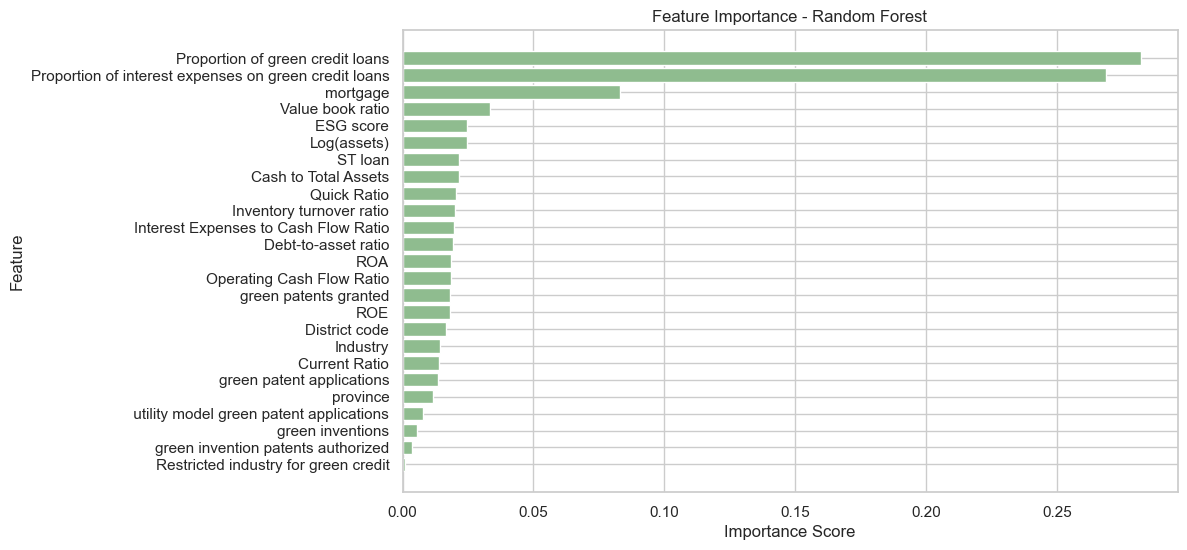

In [22]:
# 12. Feature Importance
feature_importances = model.feature_importances_
feature_names = X.columns

# Convert to a DataFrame
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(importance_df)

# 13. Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="darkseagreen")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance - Random Forest")
plt.gca().invert_yaxis()  # Flip the chart for better readability
plt.show()